In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [1]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import RandomizedSearchCV
from kerastuner.tuners import RandomSearch


ModuleNotFoundError: No module named 'tensorflow'

# Objective:

Don’t deprive me learning from your valuable feedback.Advance thanks for your time.

# Let's Understand the problem


A stroke occurs when part of the brain loses its blood supply and stops working. This causes the part of the body that the injured brain controls to stop working.
A stroke also is called a cerebrovascular accident, CVA, or "brain attack."

The types of strokes include:

Ischemic stroke (part of the brain loses blood flow)

Hemorrhagic stroke (bleeding occurs within the brain)

Transient ischemic attack, TIA, or mini-stroke (The stroke symptoms resolve within minutes, but may take up to 24 hours on their own without treatment. This is a warning sign that a stroke may occur in the near future.)



# Causes of Stroke:



Age. Stroke risk increases with age. Three-quarters of strokes occur in people ages 65 and older.

Geography. The highest U.S. death rates from stroke occur in the southeastern United States.

Gender. Men are more likely than women to have a stroke.

Certain lifestyle factors and conditions also increase the risk for stroke. The most important of these include:

High blood pressure

Diabetes

Heart disease (such as atrial fibrillation)

Previous stroke or transient ischemic attack

Cigarette smoking

Additional risk factors include:

Physical inactivity

Overweight or obesity

High cholesterol

Sickle cell disease

Drinking too much alcohol

Family history of stroke

Drug abuse

Genetic conditions, such as blood-clotting or vascular disorders (for example, Factor V Leiden or CADASIL)

Certain medications (such as hormonal birth control pills)

Being pregnant

Menopause

Lesser risk factors include:

Head and neck injuries

Recent viral or bacterial infections

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.shape

(5110, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.isna().mean()

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

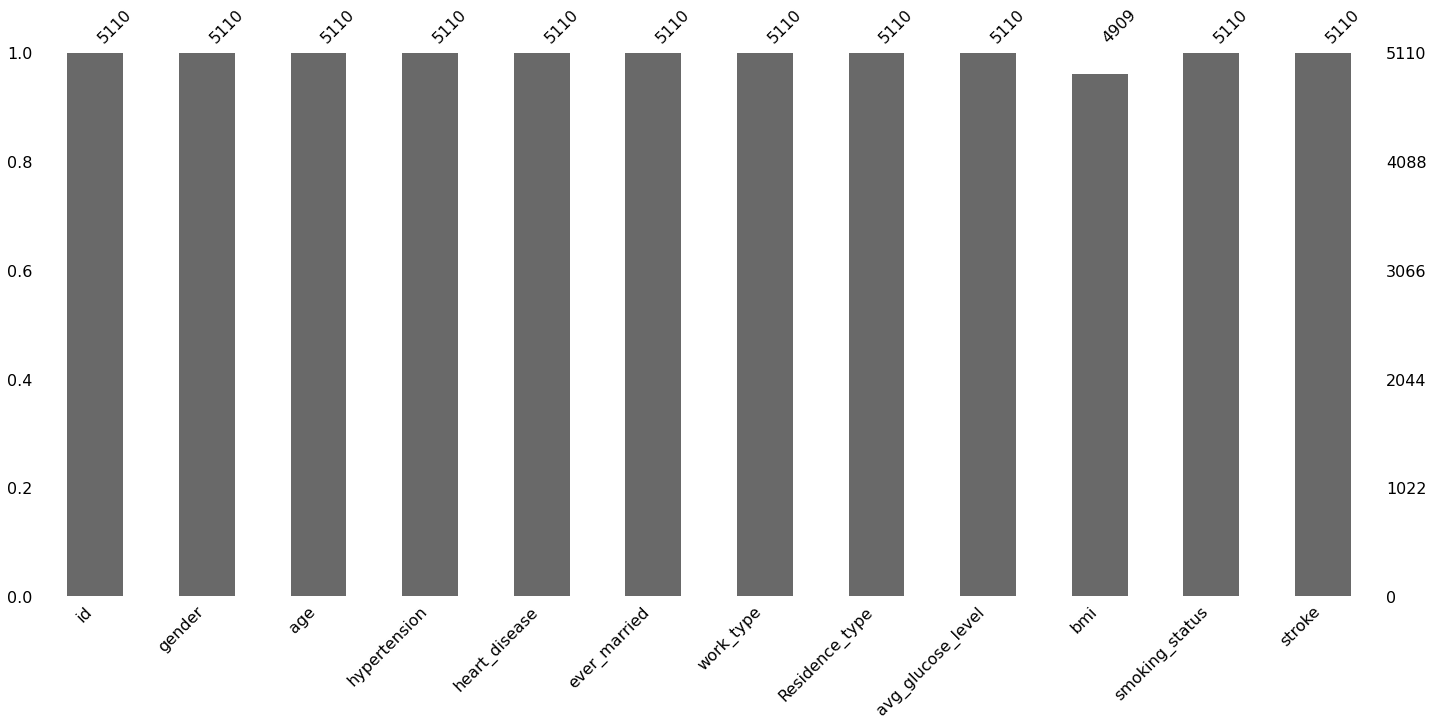

In [8]:
msno.bar(df)

Here we are seeing that 7 Categorical features.So let's start the EDA with those features.



Text(0.5, 0.98, 'Features distribution based on Stroke ')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


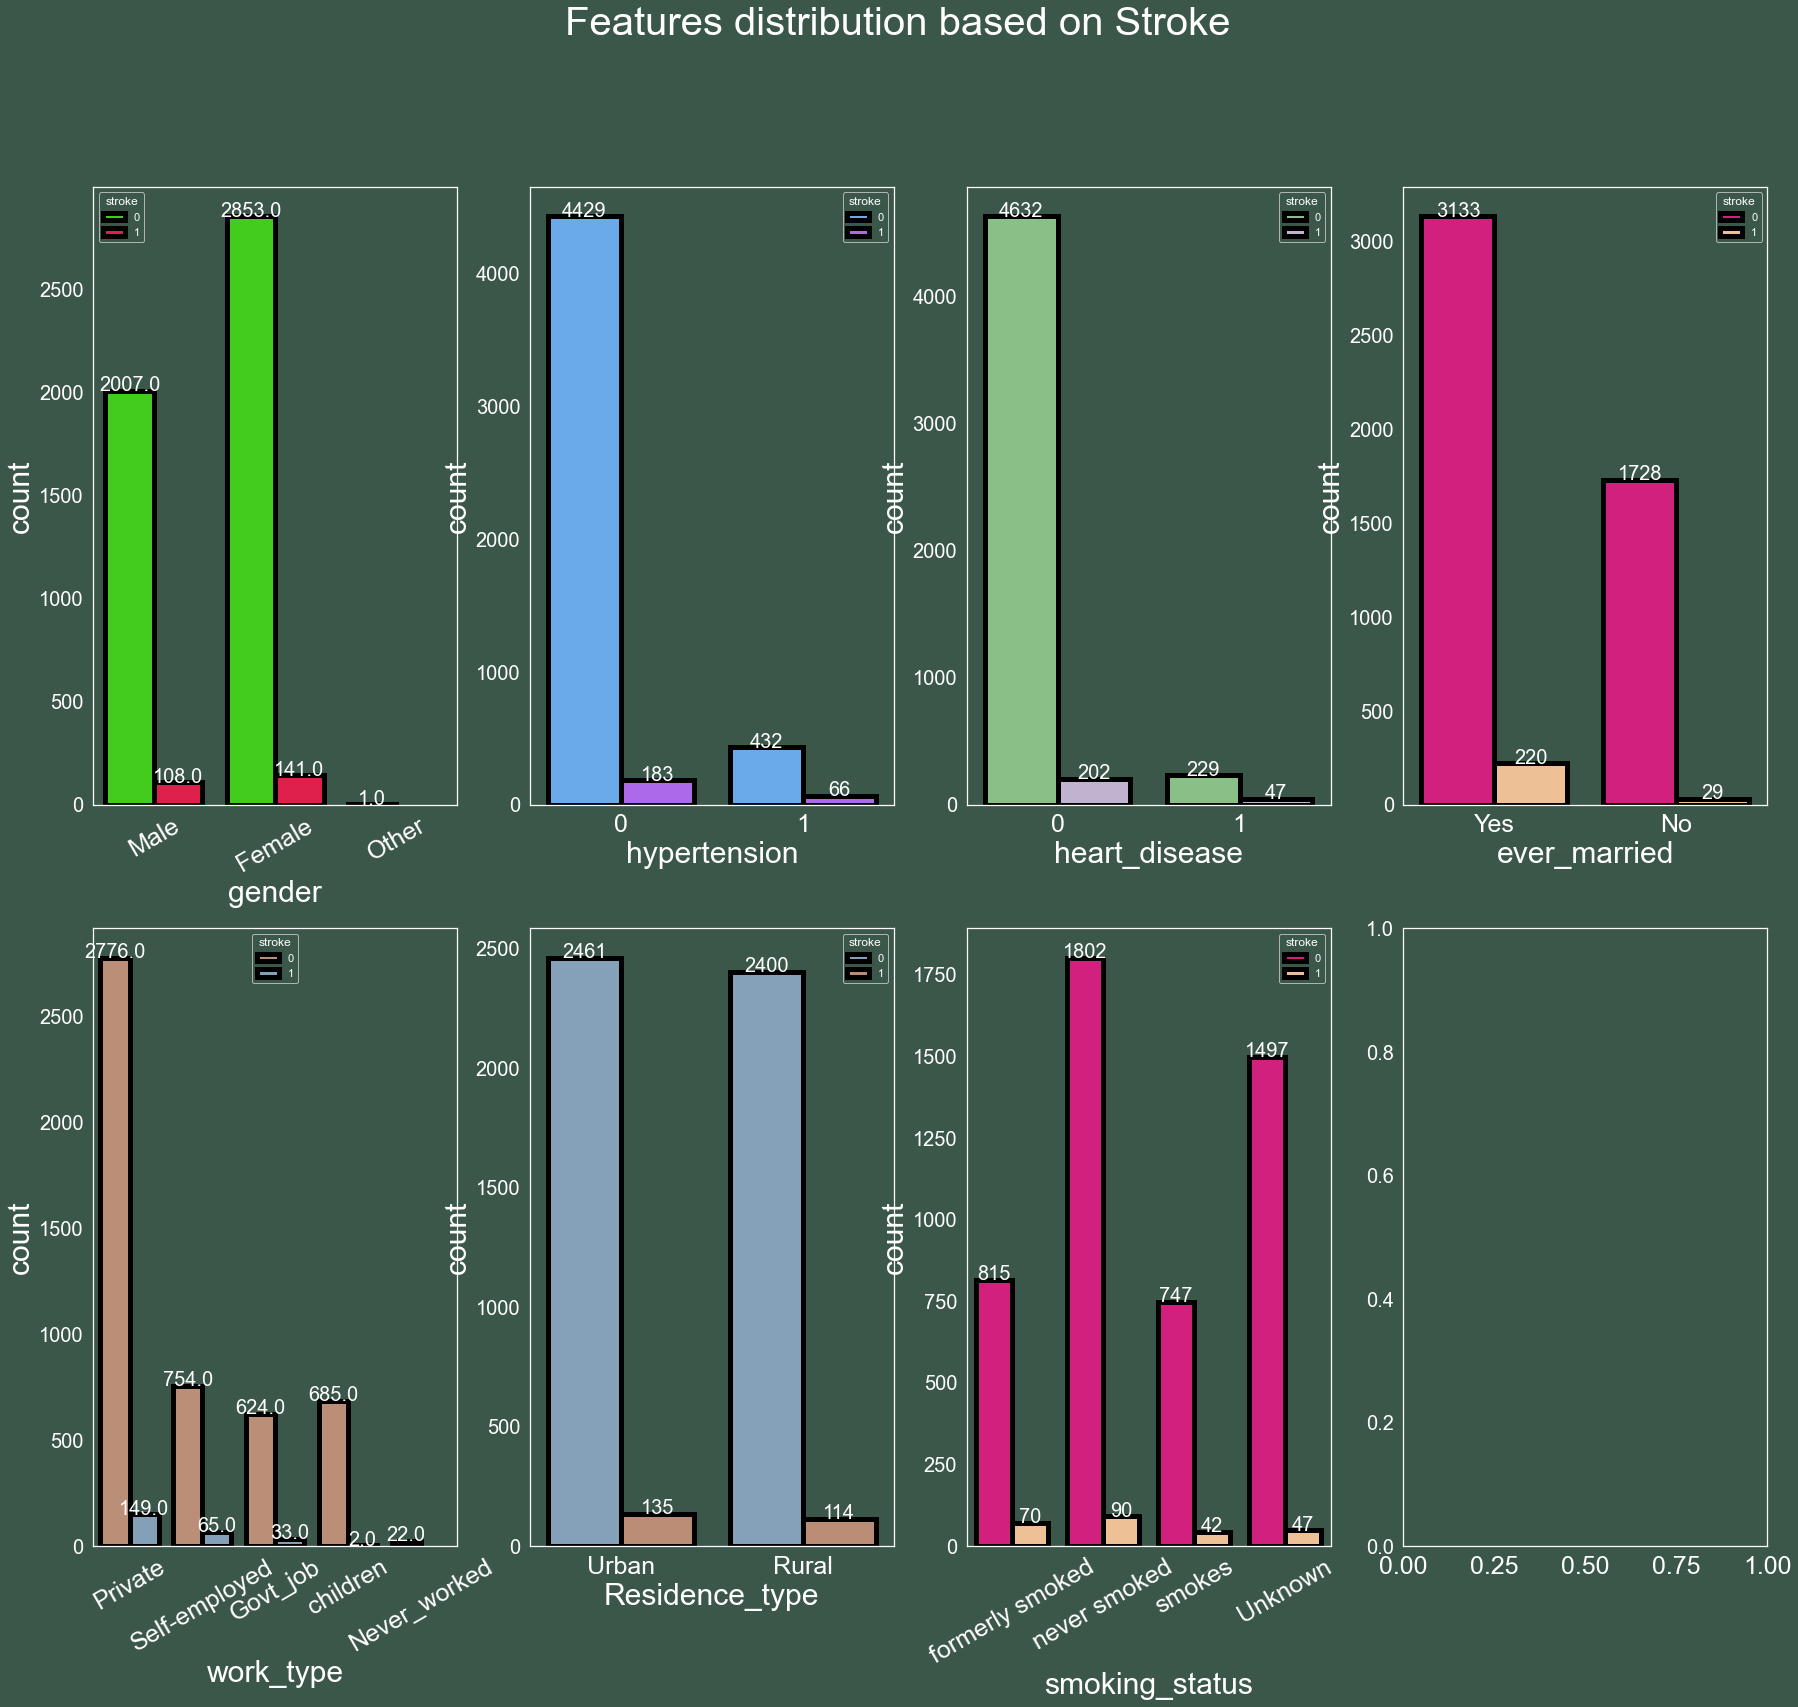

In [9]:
#plt.rcParams['figure.figsize'] = (20.0, 10.0)
#plt.rcParams['font.family'] = "serif"
#plt.rcParams['font.family'] = "cursive"
bg_color = (.23,.34,.29)
sns.set(rc={"font.style":"normal",
            "axes.facecolor":bg_color,
            "figure.facecolor":bg_color,
            "text.color":"white",
            "xtick.color":"white",
            "ytick.color":"white",
            "axes.labelcolor":"white",
            "axes.grid":False,
            'axes.labelsize':30,
            'figure.figsize':(20.0, 10.0),
            'xtick.labelsize':25,
            'ytick.labelsize':20})


f, axes = plt.subplots(2,4, figsize=(30,25))

ax = sns.countplot(data=df,
                  x = 'gender',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="prism",ax=axes[0,0]
                  )
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)

ax1 = sns.countplot(data=df,
                  x = 'hypertension',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="cool",ax=axes[0,1]
                  )
for rect in ax1.patches:
    ax1.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)

ax2 = sns.countplot(data=df,
                  x = 'heart_disease',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="Accent",ax=axes[0,2]
                  )
for rect in ax2.patches:
    ax2.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)
   
ax3 = sns.countplot(data=df,
                  x = 'ever_married',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="Accent_r",ax=axes[0,3]
                  )
for rect in ax3.patches:
    ax3.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)
   

ax4 = sns.countplot(data=df,
                  x = 'work_type',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="twilight_shifted_r",ax=axes[1,0]
                  )
ax4.set_xticklabels(ax4.get_xticklabels(),rotation=30)
for rect in ax4.patches:
    ax4.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)

ax5 = sns.countplot(data=df,
                  x = 'Residence_type',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="twilight_shifted",ax=axes[1,1]
                  )
for rect in ax5.patches:
    ax5.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)

ax6 = sns.countplot(data=df,
                  x = 'smoking_status',
                  hue = 'stroke',
             
                  edgecolor=(0,0,0),
                  linewidth=5,
                  palette="Accent_r",ax=axes[1,2]
                  )
ax6.set_xticklabels(ax6.get_xticklabels(),rotation=30)
for rect in ax6.patches:
    ax6.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.25,rect.get_height(),horizontalalignment='center', fontsize = 20.0)
   
f.suptitle('Features distribution based on Stroke ',fontsize=40)

Here we cann't compare category of each features among them, because they are not same in number.So we have to calculate the ratio.



Make Observations:
    
    Gender:
        
1. Male = (108+2007) = .054 and Female = (141/2853) = .045 

2. Male has more porne to Stroke

    Hypertension:
        
1. No =((183/4429)) =.0413 and Yes = 66/432 = .152

2. This clearly shows that people with hypertension are more porne to stroke.054

    Heart Disease:
        
1. No = ((202/4632)) = .044 and Yes = (47./229) = .20

2. This also shows people having heart disease are more porne to stroke.054

    Married:
        
1. Yes = (220/3133) = .07 NO = (29/1728) = 0.016

2. It indaicates Unmarried people are safer then then married.

Text(0.5, 0.98, 'Numerical Features distribution')

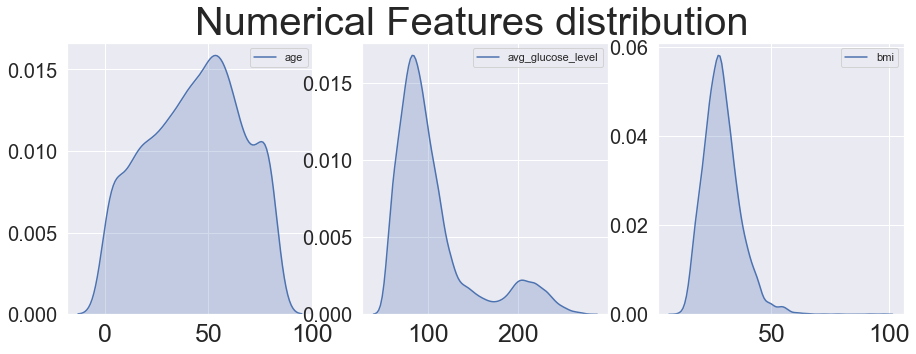

In [10]:
#Let's analyze the Numerical Columns.

sns.set_style(style = 'darkgrid')
f, axes = plt.subplots(1,3, figsize = (15,5))

sns.kdeplot(df['age'],shade = True ,ax=axes[0])
sns.kdeplot(df['avg_glucose_level'],shade = True ,ax=axes[1])
sns.kdeplot(df['bmi'],shade = True ,ax=axes[2])
f.suptitle('Numerical Features distribution',fontsize=40)



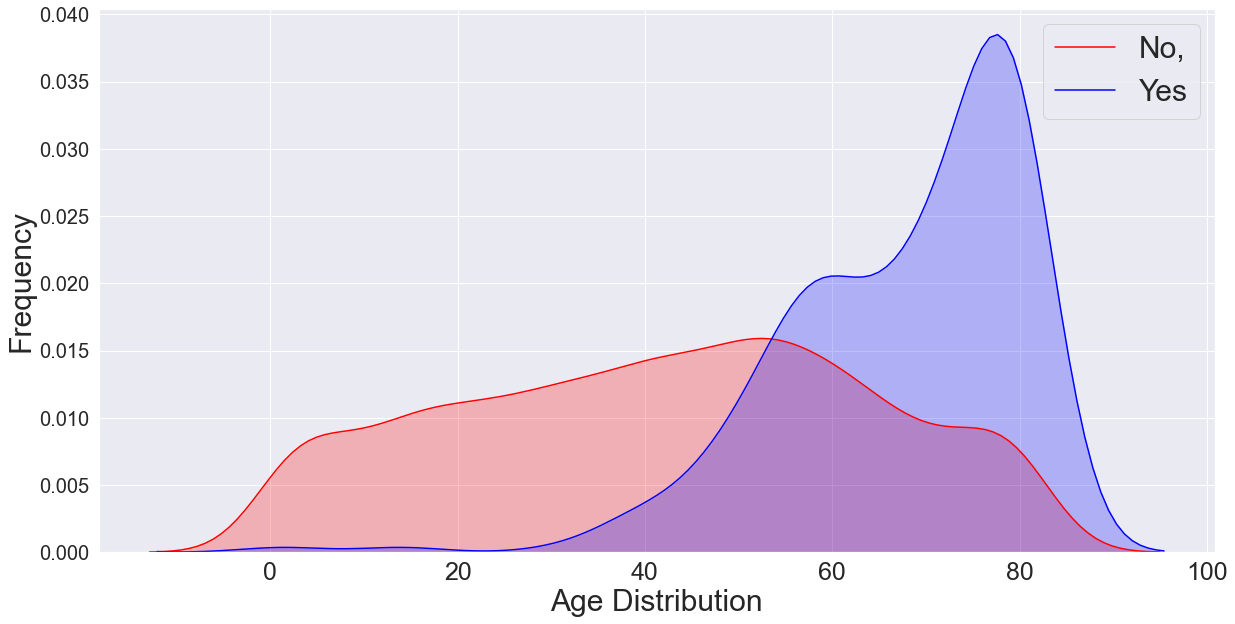

In [11]:
g = sns.kdeplot(df['age'][(df["stroke"] == 0)] , color="Red", shade = True)
g = sns.kdeplot(df['age'][(df["stroke"] == 1)], ax =g, color="Blue", shade= True)
g.set_xlabel('Age Distribution')
g.set_ylabel("Frequency")
g = g.legend(["No,","Yes"],fontsize = 30)

Observations:
    
1.People do have stroke mostly are Old and ranging from around 60 to 100 

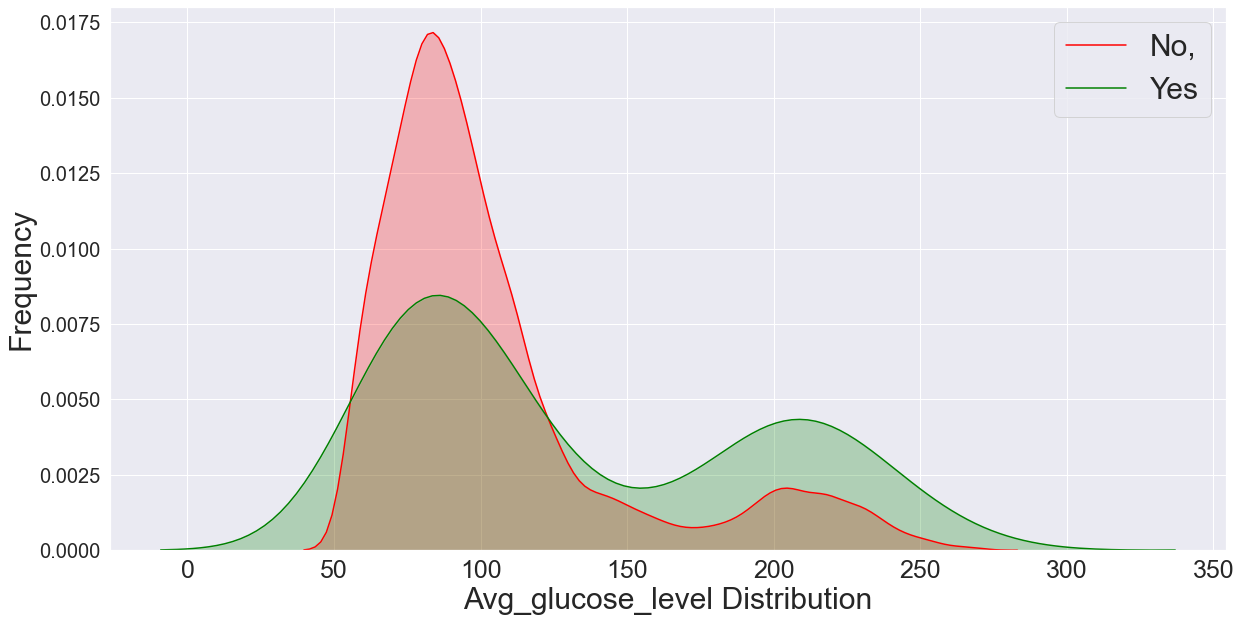

In [12]:
g = sns.kdeplot(df['avg_glucose_level'][(df["stroke"] == 0)] , color="Red", shade = True)
g = sns.kdeplot(df['avg_glucose_level'][(df["stroke"] == 1)], ax =g, color="Green", shade= True)
g.set_xlabel('Avg_glucose_level Distribution')
g.set_ylabel("Frequency")
g = g.legend(["No,","Yes"],fontsize = 30)

Obserbations:
    
1. People have stroke having avg_glucose_level around 100 and 200.

2. People  don't have stroke having avg_glucose_level around 75.


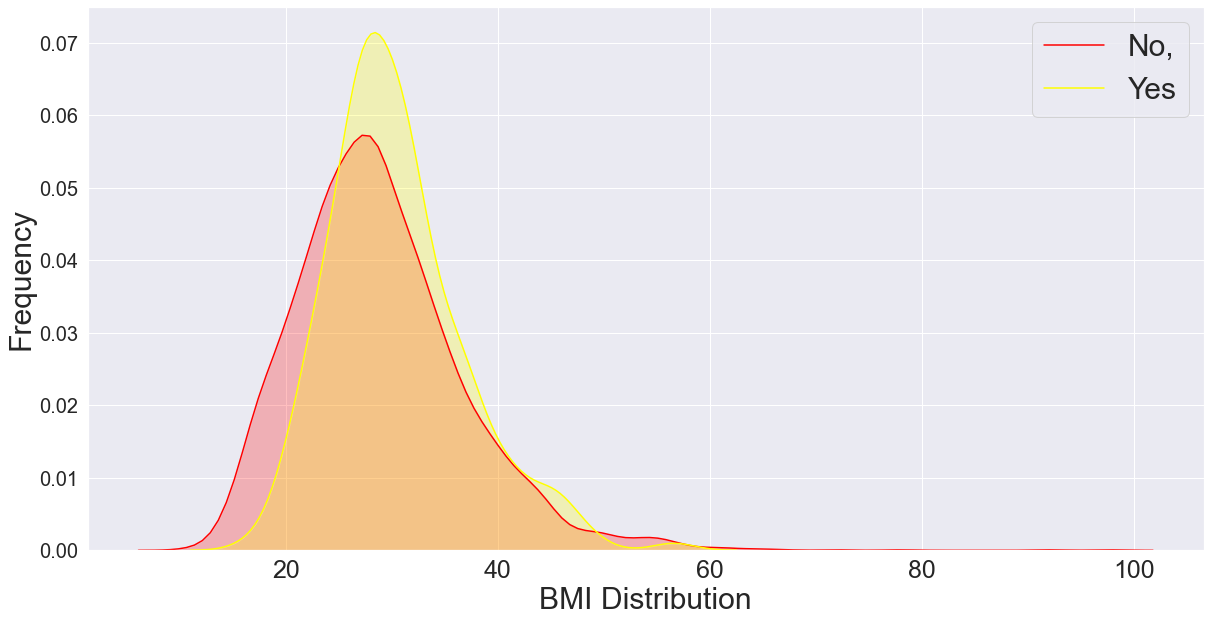

In [13]:
sns.set_palette(palette = 'YlGn')
g = sns.kdeplot(df['bmi'][(df["stroke"] == 0)] , color="Red", shade = True)
g = sns.kdeplot(df['bmi'][(df["stroke"] == 1)], ax =g, color="Yellow", shade= True)
g.set_xlabel('BMI Distribution')
g.set_ylabel("Frequency")
g = g.legend(["No,","Yes"],fontsize = 30)

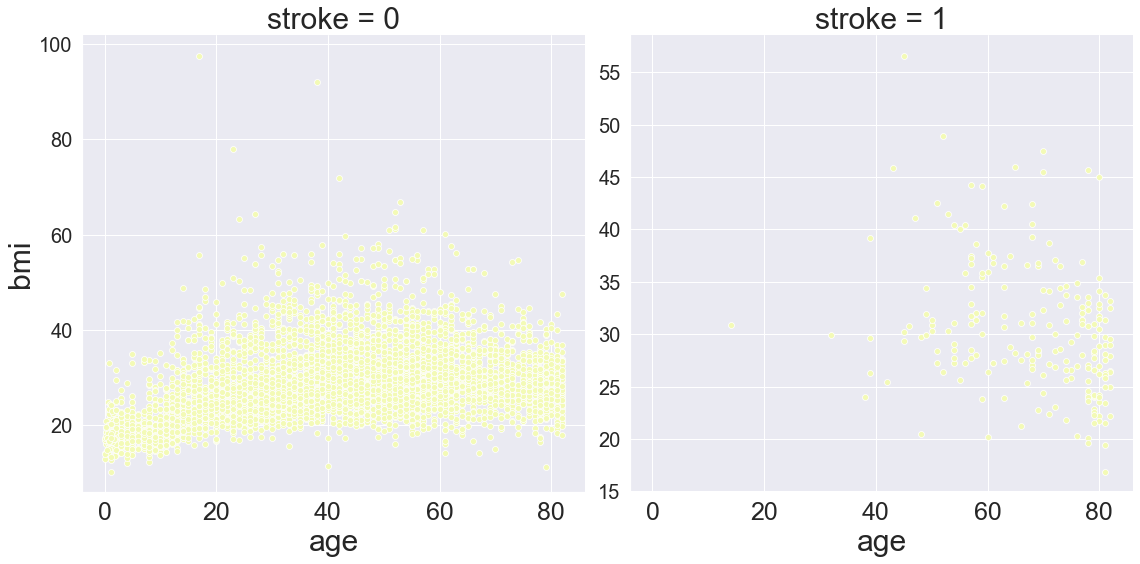

In [14]:
plt.Figure(figsize = (10,15))
g = sns.FacetGrid(df, col="stroke",height=8, aspect=1,palette = 'blue', sharey = False)
g.map(sns.scatterplot, "age", "bmi")

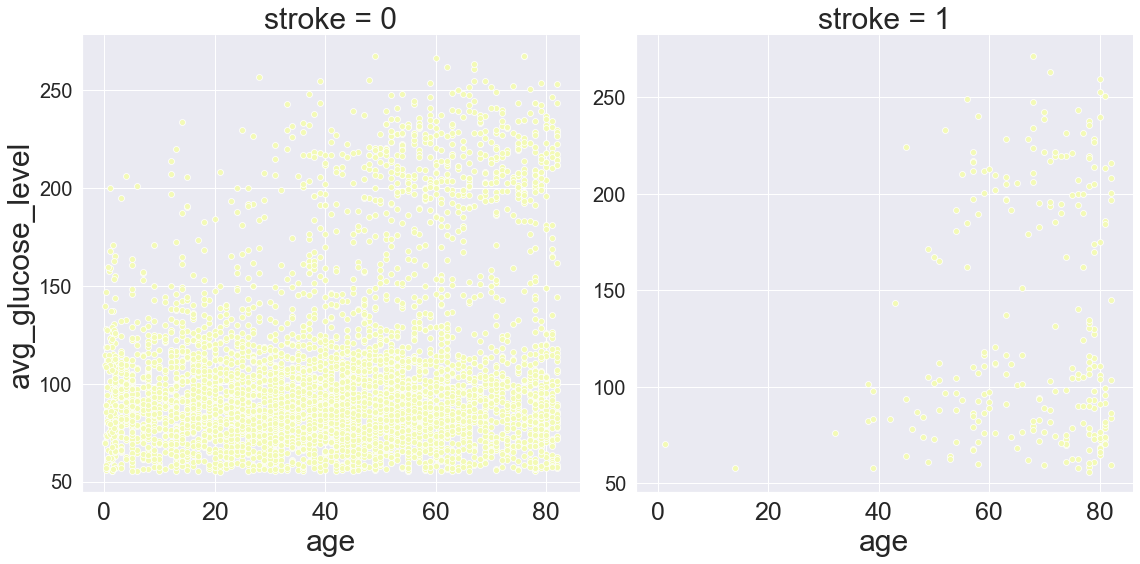

In [15]:
plt.Figure(figsize = (10,15))
g = sns.FacetGrid(df, col="stroke",height=8, aspect=1,palette = 'BuPu', sharey = False)
g.map(sns.scatterplot, "age", "avg_glucose_level")

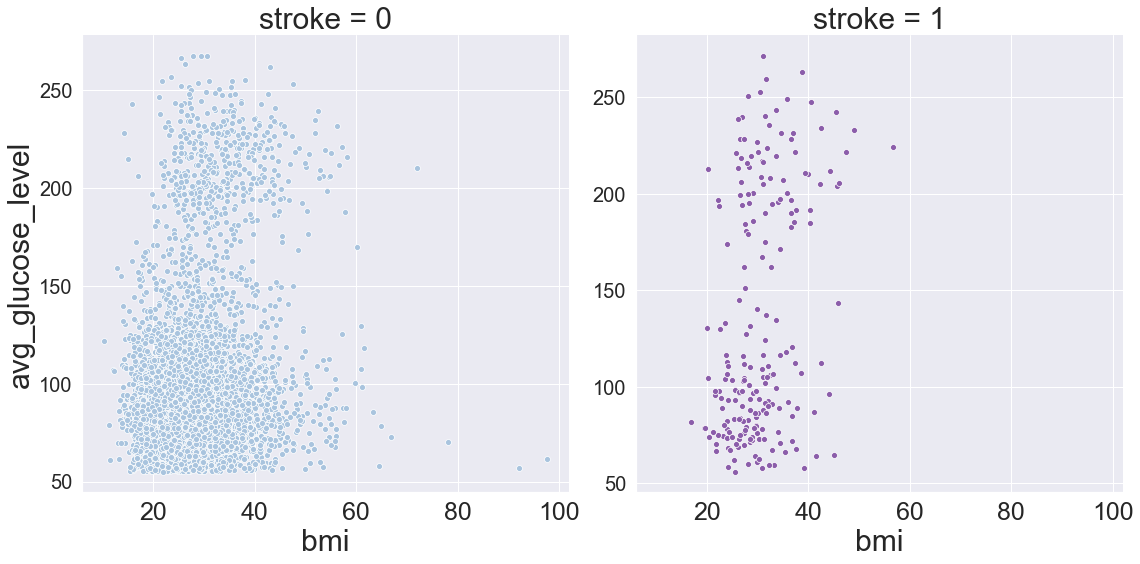

In [16]:

plt.Figure(figsize = (10,15))
g = sns.FacetGrid(df, col="stroke",hue = 'stroke', height=8, aspect=1,palette = 'BuPu', sharey = False)
g.map(sns.scatterplot, "bmi", "avg_glucose_level")

# Feature Engineering

In [17]:
df.dropna(inplace = True)

In [18]:
df = pd.get_dummies(df,
                    columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'],
                    drop_first=True)

In [19]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

# Handling imbalance data using SMOTE based techniques


In [22]:
from imblearn.over_sampling import SMOTE
from collections import Counter

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 3771, 1: 156})
After Counter({0: 3771, 1: 3771})


In [23]:
#ADASYN
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)


Before Counter({0: 3771, 1: 156})
After Counter({1: 3790, 0: 3771})


In [24]:
#SMOTE + TOMEK
from imblearn.combine import SMOTETomek

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
X_train_smtom, y_train_smtom = smtom.fit_resample(X_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)


Before Counter({0: 3771, 1: 156})
After Counter({0: 3480, 1: 3480})


In [25]:
# SMOTE+ ENN
from imblearn.combine import SMOTEENN

counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
X_train_smenn, y_train_smenn = smenn.fit_resample(X_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({0: 3771, 1: 156})
After Counter({1: 2428, 0: 2007})


In [26]:
#SMOTE + UNDER SAMPLING
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
sm = SMOTE(sampling_strategy = .3)
rus =  RandomUnderSampler(sampling_strategy=.4)

pipeline = Pipeline(steps = [('smote', sm),('under',rus)])

counter = Counter(y_train)
print('Before',counter)
#over and undersampling the train dataset using SMOTE + RandomUnderSampler
X_train_smrus, y_train_smrus = pipeline.fit_resample(X_train, y_train)

counter = Counter(y_train_smrus)
print('After',counter)

Before Counter({0: 3771, 1: 156})
After Counter({0: 2827, 1: 1131})


# Model Building

In [27]:
sampled_data = {
    'ACTUAL':[X_train, y_train],
    'SMOTE':[X_train_sm, y_train_sm],
    'ADASYN':[X_train_ada, y_train_ada],
    'SMOTE_TOMEK':[X_train_smtom, y_train_smtom],
    'SMOTE_ENN':[X_train_smenn, y_train_smenn],
    'UNDERSAMPLING': [X_train_smrus, y_train_smrus]
}

In [28]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)  
    #plt.show() 
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
    
    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')
          
    
    return algo,precision,recall,f1,sampling
    

In [29]:
model_params = {

    'random-forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
             "n_estimators": [5, 10, 15, 20, 25], 
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']

         }
    },
    'logisticregression': {
        'model' : LogisticRegression(),
        'params' : {
            'C' : [1,6,10],
            'penalty': ['l1', 'l2']
        }
    },
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']
        }
        
    }
    
}

In [30]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
       
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, X_test, y_test, model, resam))

random-forest with ACTUAL
Confusion Matrix
[[929   0]
 [ 53   0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982
 

AUC-ROC
0.8372971545788735


C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


random-forest with SMOTE
Confusion Matrix
[[865  64]
 [ 44   9]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       929
           1       0.12      0.17      0.14        53

    accuracy                           0.89       982
   macro avg       0.54      0.55      0.54       982
weighted avg       0.91      0.89      0.90       982
 

AUC-ROC
0.7453744135507849
random-forest with ADASYN
Confusion Matrix
[[859  70]
 [ 43  10]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       929
           1       0.12      0.19      0.15        53

    accuracy                           0.88       982
   macro avg       0.54      0.56      0.54       982
weighted avg       0.91      0.88      0.90       982
 

AUC-ROC
0.7460751061193818
random-forest with SMOTE_TOMEK
Confusion Matrix
[[864  65]
 [ 42  11]] 

Classification Report
              

C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


logisticregression with ACTUAL
Confusion Matrix
[[929   0]
 [ 52   1]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       1.00      0.02      0.04        53

    accuracy                           0.95       982
   macro avg       0.97      0.51      0.50       982
weighted avg       0.95      0.95      0.92       982
 

AUC-ROC
0.6591384527895687


C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


logisticregression with SMOTE
Confusion Matrix
[[773 156]
 [ 30  23]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       929
           1       0.13      0.43      0.20        53

    accuracy                           0.81       982
   macro avg       0.55      0.63      0.55       982
weighted avg       0.92      0.81      0.86       982
 

AUC-ROC
0.7577837804902817


C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnin

logisticregression with ADASYN
Confusion Matrix
[[772 157]
 [ 29  24]] 

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       929
           1       0.13      0.45      0.21        53

    accuracy                           0.81       982
   macro avg       0.55      0.64      0.55       982
weighted avg       0.92      0.81      0.86       982
 

AUC-ROC
0.7543310924711092


C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


logisticregression with SMOTE_TOMEK
Confusion Matrix
[[803 126]
 [ 29  24]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       929
           1       0.16      0.45      0.24        53

    accuracy                           0.84       982
   macro avg       0.56      0.66      0.57       982
weighted avg       0.92      0.84      0.88       982
 

AUC-ROC
0.7592867152750981
logisticregression with SMOTE_ENN
Confusion Matrix
[[715 214]
 [ 20  33]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.77      0.86       929
           1       0.13      0.62      0.22        53

    accuracy                           0.76       982
   macro avg       0.55      0.70      0.54       982
weighted avg       0.93      0.76      0.82       982
 

AUC-ROC
0.7845522676036314


C:\Users\Sudhakor Das\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


logisticregression with UNDERSAMPLING
Confusion Matrix
[[794 135]
 [ 28  25]] 

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.85      0.91       929
           1       0.16      0.47      0.23        53

    accuracy                           0.83       982
   macro avg       0.56      0.66      0.57       982
weighted avg       0.92      0.83      0.87       982
 

AUC-ROC
0.7641814082905133
decision_tree with ACTUAL
Confusion Matrix
[[928   1]
 [ 53   0]] 

Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982
 

AUC-ROC
0.7856794686922437
decision_tree with SMOTE
Confusion Matrix
[[804 125]
 [ 35  18]] 

Classification Report
       

In [31]:
result = pd.DataFrame(output, columns = ['Model','Precision','Recall', 'F1-score','Resample'])

In [32]:
result

,Model,Precision,Recall,F1-score,Resample
0,random-forest,0.000000,0.000000,0.000000,ACTUAL
1,random-forest,0.123288,0.169811,0.142857,SMOTE
2,random-forest,0.125000,0.188679,0.150376,ADASYN
3,random-forest,0.144737,0.207547,0.170543,SMOTE_TOMEK
4,random-forest,0.133333,0.415094,0.201835,SMOTE_ENN
5,random-forest,0.140000,0.132075,0.135922,UNDERSAMPLING
6,logisticregression,1.000000,0.018868,0.037037,ACTUAL
7,logisticregression,0.128492,0.433962,0.198276,SMOTE
8,logisticregression,0.132597,0.452830,0.205128,ADASYN
9,logisticregression,0.160000,0.452830,0.236453,SMOTE_TOMEK


Let's try it with neural network 

In [32]:
def build_model(hp):
    model = keras.models.Sequential()
    
    model.add(layers.Dense(units=hp.Int('Input_units',min_value = 6, max_value = 12),
                    activation =hp.Choice('input_act', ['relu', 'sigmoid']), input_dim = 17))
    
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation=hp.Choice('act_' + str(i), ['relu', 'sigmoid'])))
        
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='binary_crossentropy',
         metrics='accuracy')
    return model

In [33]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir2',
    project_name='StrokePrediction')

In [34]:
def train_test(X_train,y_train,X_test, y_test,algo,sampling = None ):
    tuner.search(X_train, y_train,
                 epochs=5,
                 validation_data=(X_test, y_test))
    best_hp = tuner.get_best_hyperparameters()[0]
    model = tuner.hypermodel.build(best_hp)
    model.fit(X_train, y_train, epochs = 5, validation_split = .1 )
    y_p = model.predict(X_test)
    y_pred = []
    for element in y_p:
        if element > .5:
            y_pred.append(1)
        else:
            y_pred.append(0)

    f1 = f1_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    precision = precision_score(y_test, y_pred, average='binary')

    print(classification_report(y_test,y_pred),"\n")
    
    return algo,precision,recall,f1,sampling

# ACTUALL:

In [35]:
output.append(train_test(X_train, y_train, X_test, y_test, 'ANN', 'ACTUAL'))

Trial 5 Complete [00h 00m 26s]
val_accuracy: 0.9460285305976868

Best val_accuracy So Far: 0.9460285305976868
Total elapsed time: 00h 01m 28s
Epoch 1/5
111/111 [==============================] - 1s 5ms/step - loss: 0.4768 - accuracy: 0.9635 - val_loss: 0.2120 - val_accuracy: 0.9517
Epoch 2/5
111/111 [==============================] - 0s 3ms/step - loss: 0.1850 - accuracy: 0.9578 - val_loss: 0.1942 - val_accuracy: 0.9517
Epoch 3/5
111/111 [==============================] - 0s 3ms/step - loss: 0.1693 - accuracy: 0.9595 - val_loss: 0.1949 - val_accuracy: 0.9517
Epoch 4/5
111/111 [==============================] - 0s 4ms/step - loss: 0.1801 - accuracy: 0.9562 - val_loss: 0.1958 - val_accuracy: 0.9517
Epoch 5/5
111/111 [==============================] - 0s 4ms/step - loss: 0.1706 - accuracy: 0.9593 - val_loss: 0.1950 - val_accuracy: 0.9517
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: Undefine

# SMOTE:

In [36]:
output.append(train_test(X_train_sm, y_train_sm, X_test, y_test, 'ANN', 'SMOTE'))

Epoch 1/5
213/213 [==============================] - 2s 4ms/step - loss: 0.6888 - accuracy: 0.5503 - val_loss: 0.8126 - val_accuracy: 0.0000e+00
Epoch 2/5
213/213 [==============================] - 1s 3ms/step - loss: 0.6874 - accuracy: 0.5549 - val_loss: 0.8305 - val_accuracy: 0.0000e+00
Epoch 3/5
213/213 [==============================] - 1s 3ms/step - loss: 0.6858 - accuracy: 0.5603 - val_loss: 0.7818 - val_accuracy: 0.0000e+00
Epoch 4/5
213/213 [==============================] - 1s 3ms/step - loss: 0.6853 - accuracy: 0.5630 - val_loss: 0.7866 - val_accuracy: 0.0000e+00
Epoch 5/5
213/213 [==============================] - 1s 3ms/step - loss: 0.6879 - accuracy: 0.5503 - val_loss: 0.8758 - val_accuracy: 0.0000e+00
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
wei

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: Undefine

# ADASYN:

In [37]:
output.append(train_test(X_train_ada, y_train_ada, X_test, y_test, 'ANN', 'SMOTE'))

Epoch 1/5
213/213 [==============================] - 1s 4ms/step - loss: 0.6914 - accuracy: 0.5154 - val_loss: 0.8013 - val_accuracy: 0.0000e+00
Epoch 2/5
213/213 [==============================] - 1s 3ms/step - loss: 0.6865 - accuracy: 0.5579 - val_loss: 0.8287 - val_accuracy: 0.0000e+00
Epoch 3/5
213/213 [==============================] - 1s 3ms/step - loss: 0.6897 - accuracy: 0.5448 - val_loss: 0.8255 - val_accuracy: 0.0000e+00
Epoch 4/5
213/213 [==============================] - 1s 3ms/step - loss: 0.6894 - accuracy: 0.5469 - val_loss: 0.8132 - val_accuracy: 0.0000e+00
Epoch 5/5
213/213 [==============================] - 1s 3ms/step - loss: 0.6875 - accuracy: 0.5524 - val_loss: 0.8403 - val_accuracy: 0.0000e+00
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
wei

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: Undefine

# SMOTE + TOMEK:

In [38]:
output.append(train_test(X_train_smtom, y_train_smtom, X_test, y_test, 'ANN', 'SMOTE_TOMEK'))

Epoch 1/5
196/196 [==============================] - 1s 4ms/step - loss: 0.6902 - accuracy: 0.5402 - val_loss: 0.7729 - val_accuracy: 0.0000e+00
Epoch 2/5
196/196 [==============================] - 1s 3ms/step - loss: 0.6890 - accuracy: 0.5442 - val_loss: 0.8007 - val_accuracy: 0.0000e+00
Epoch 3/5
196/196 [==============================] - 1s 3ms/step - loss: 0.6883 - accuracy: 0.5503 - val_loss: 0.8277 - val_accuracy: 0.0000e+00
Epoch 4/5
196/196 [==============================] - 1s 3ms/step - loss: 0.6834 - accuracy: 0.5700 - val_loss: 0.7668 - val_accuracy: 0.0000e+00
Epoch 5/5
196/196 [==============================] - 1s 3ms/step - loss: 0.6886 - accuracy: 0.5480 - val_loss: 0.8224 - val_accuracy: 0.0000e+00
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
wei

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: Undefine

# SMOTE + ENN:

In [39]:
output.append(train_test(X_train_smenn, y_train_smenn, X_test, y_test, 'ANN', 'SMOTE_ENN'))

Epoch 1/5
127/127 [==============================] - 1s 5ms/step - loss: 0.6924 - accuracy: 0.5157 - val_loss: 0.6594 - val_accuracy: 0.9978
Epoch 2/5
127/127 [==============================] - 0s 3ms/step - loss: 0.6891 - accuracy: 0.5386 - val_loss: 0.7282 - val_accuracy: 0.1514
Epoch 3/5
127/127 [==============================] - 0s 4ms/step - loss: 0.6896 - accuracy: 0.5428 - val_loss: 0.6601 - val_accuracy: 0.9978
Epoch 4/5
127/127 [==============================] - 0s 3ms/step - loss: 0.6895 - accuracy: 0.5288 - val_loss: 0.6471 - val_accuracy: 0.9933
Epoch 5/5
127/127 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.5331 - val_loss: 0.7425 - val_accuracy: 0.0490
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       929
           1       0.21      0.08      0.11        53

    accuracy                           0.93       982
   macro avg       0.58      0.53      0.54       982
weighted avg       0.91

# UNDER_SAMPLING:

In [40]:
output.append(train_test(X_train_smrus, y_train_smrus, X_test, y_test, 'ANN', 'UNDERSAMPLING'))

Epoch 1/5
112/112 [==============================] - 1s 5ms/step - loss: 0.6286 - accuracy: 0.7151 - val_loss: 1.4862 - val_accuracy: 0.0000e+00
Epoch 2/5
112/112 [==============================] - 0s 4ms/step - loss: 0.5034 - accuracy: 0.7982 - val_loss: 1.5688 - val_accuracy: 0.0000e+00
Epoch 3/5
112/112 [==============================] - 0s 3ms/step - loss: 0.5172 - accuracy: 0.7872 - val_loss: 1.6407 - val_accuracy: 0.0000e+00
Epoch 4/5
112/112 [==============================] - 0s 4ms/step - loss: 0.4913 - accuracy: 0.8054 - val_loss: 1.4695 - val_accuracy: 0.0000e+00
Epoch 5/5
112/112 [==============================] - 0s 3ms/step - loss: 0.5053 - accuracy: 0.7948 - val_loss: 1.3785 - val_accuracy: 0.0000e+00
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
wei

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: Undefine

In [41]:
result = pd.DataFrame(output, columns = ['Model','Precision','Recall', 'F1-score','Resample'])

In [42]:
result

,Model,Precision,Recall,F1-score,Resample
0,random-forest,0.000000,0.000000,0.000000,ACTUAL
1,random-forest,0.141414,0.264151,0.184211,SMOTE
2,random-forest,0.128205,0.188679,0.152672,ADASYN
3,random-forest,0.126761,0.169811,0.145161,SMOTE_TOMEK
4,random-forest,0.130435,0.339623,0.188482,SMOTE_ENN
5,random-forest,0.152542,0.169811,0.160714,UNDERSAMPLING
6,logisticregression,1.000000,0.018868,0.037037,ACTUAL
7,logisticregression,0.128492,0.433962,0.198276,SMOTE
8,logisticregression,0.133333,0.452830,0.206009,ADASYN
9,logisticregression,0.135294,0.433962,0.206278,SMOTE_TOMEK


surprisingly in every Smote technique
in ANN i got alomost same type of
result.Can anyone help me 
in fixing this problem. 

Work in progress.